# Ecological footprint



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import * 

df = pd.read_csv('spain_all_data.csv')
df.tail()

,Unnamed: 0,builtupLand,carbon,countryCode,countryName,cropLand,fishingGround,forestLand,grazingLand,id,isoa2,record,score,shortName,value,version,year
864,864,NaN,NaN,203,Spain,NaN,NaN,NaN,NaN,128894,ES,Population,NaN,Spain,46857400.0,NaN,2012
865,865,NaN,NaN,203,Spain,NaN,NaN,NaN,NaN,128895,ES,Population,NaN,Spain,46697556.0,NaN,2013
866,866,NaN,NaN,203,Spain,NaN,NaN,NaN,NaN,128896,ES,Population,NaN,Spain,46521828.0,NaN,2014
867,867,NaN,NaN,203,Spain,NaN,NaN,NaN,NaN,128897,ES,Population,NaN,Spain,46397664.0,NaN,2015
868,868,NaN,NaN,203,Spain,NaN,NaN,NaN,NaN,128898,ES,Population,NaN,Spain,46347576.0,NaN,2016


In [4]:
df.count()

Unnamed: 0       869
builtupLand      728
carbon           728
countryCode      869
countryName      869
cropLand         728
fishingGround    728
forestLand       728
grazingLand      728
id               869
isoa2            869
record           869
score            728
shortName        869
value            869
version            0
year             869
dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0         0
builtupLand      141
carbon           141
countryCode        0
countryName        0
cropLand         141
fishingGround    141
forestLand       141
grazingLand      141
id                 0
isoa2              0
record             0
score            141
shortName          0
value              0
version          869
year               0
dtype: int64

Hacemos una copia del dataframe correspondiente a los valores recopilados para España


In [6]:
spain2 = df.copy()


Eliminamos la columna 'version'

In [7]:
spain2.drop(['version', 'Unnamed: 0'], axis=1, inplace=True)

Eliminamos los índices nulos

In [8]:
spain2 = spain2.drop(spain2[(spain2['builtupLand'].isnull()) |
                      (spain2['carbon'].isnull()) | 
                      (spain2['cropLand'].isnull()) | 
                      (spain2['fishingGround'].isnull())|
                      (spain2['forestLand'].isnull())| 
                      (spain2['grazingLand'].isnull())|
                      (spain2['score'].isnull())].index)

In [9]:
spain2.count()

builtupLand      728
carbon           728
countryCode      728
countryName      728
cropLand         728
fishingGround    728
forestLand       728
grazingLand      728
id               728
isoa2            728
record           728
score            728
shortName        728
value            728
year             728
dtype: int64

In [21]:
spain2.head()

,Unnamed: 0,builtupLand,carbon,countryCode,countryName,cropLand,fishingGround,forestLand,grazingLand,id,isoa2,record,score,shortName,value,year
0,0,0.018509,0.0,203,Spain,0.741322,0.242950,0.364454,0.378919,86725,ES,AreaPerCap,3A,Spain,1.746155,1961
1,1,0.018509,0.0,203,Spain,0.736760,0.240241,0.363184,0.372112,86737,ES,AreaPerCap,3A,Spain,1.730807,1962
2,2,0.018509,0.0,203,Spain,0.728842,0.237503,0.364569,0.364997,86749,ES,AreaPerCap,3A,Spain,1.714420,1963
3,3,0.018509,0.0,203,Spain,0.710976,0.234814,0.363172,0.357582,86761,ES,AreaPerCap,3A,Spain,1.685053,1964
4,4,0.018509,0.0,203,Spain,0.704489,0.232224,0.361867,0.351136,86773,ES,AreaPerCap,3A,Spain,1.668225,1965


In [10]:
spain2.describe()

,builtupLand,carbon,countryCode,cropLand,fishingGround,forestLand,grazingLand,id,value,year
count,7.280000e+02,7.280000e+02,728.0,7.280000e+02,7.280000e+02,7.280000e+02,7.280000e+02,728.000000,7.280000e+02,728.000000
mean,3.299031e+05,1.801715e+07,203.0,1.159654e+07,4.140711e+06,4.937061e+06,2.603093e+06,92894.269231,4.162446e+07,1988.500000
std,5.622708e+05,3.451884e+07,0.0,1.520245e+07,5.986761e+06,6.345775e+06,3.444591e+06,20223.523907,5.992147e+07,16.174342
min,0.000000e+00,0.000000e+00,203.0,2.894913e-02,2.890644e-02,8.278720e-04,3.652263e-03,86725.000000,1.917380e-01,1961.000000
25%,0.000000e+00,0.000000e+00,203.0,5.923021e-01,1.924222e-01,2.550124e-01,1.165088e-01,86906.750000,1.599070e+00,1974.750000
50%,2.135638e-02,1.316151e+00,203.0,1.029431e+00,4.529912e-01,3.998708e-01,2.643483e-01,87088.500000,4.294736e+00,1988.500000
75%,6.452606e+05,1.964758e+07,203.0,2.265700e+07,7.500266e+06,1.077527e+07,5.381522e+06,87270.250000,6.112205e+07,2002.250000
max,2.218735e+06,1.668954e+08,203.0,5.387368e+07,2.164496e+07,2.526484e+07,1.167738e+07,162927.000000,2.687919e+08,2016.000000


Visualicemos :)


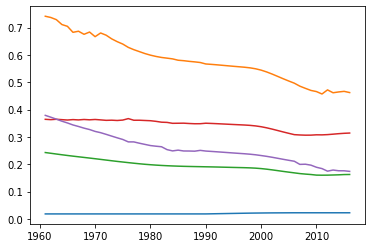

In [67]:
#fig = plt.figure(figsize=(20, 10))
#for type_land in ['builtupLand', 'cropLand', 'fishingGround', 'forestLand', 'grazingLand']:
    #plot(spain2['year'], spain2[type_land])

#plt.legend(('builtupLand', 'cropLand', 'fishingGround', 'forestLand', 'grazingLand'))
#plt.show()

#plot(spain2['year'], spain2['fishingGround'])

#p1, p2, p3, p4, p5 = plot(spain2['year'], spain2['builtupLand'],
                  #spain2['year'], spain2['cropLand'],
                  #spain2['year'], spain2['fishingGround'],
                  #spain2['year'], spain2['forestLand'],
                  #spain2['year'], spain2['grazingLand'])
                  

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
#legend(('builtupLand', 'cropLand', 'fishingGround', 'forestLand', 'grazingLand'),
#prop = {'size':8}, loc = 'upper right')

#xlabel('Años')
#ylabel('HA')
#title('Representacion de tipos de aprovechamiento de suelo')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
#figure(figsize=(560, 100))
builtupLand = spain2['builtupLand'][:56]
cropLand = spain2['cropLand'][:56]
fishingGround = spain2['fishingGround'][:56]
forestLand = spain2['forestLand'][:56]
grazingLand = spain2['grazingLand'][:56]
x = spain2['year'][:56]

fig, ax = plt.subplots()
ax.plot(x, builtupLand, label="builtupLand")
ax.plot(x, cropLand, label="cropLand")
ax.plot(x, fishingGround, label="fishingGround")
ax.plot(x, forestLand, label="forestLand")
ax.plot(x, grazingLand, label="grazingLand")
ax.plot()

plt.show()



In [44]:
spain2['year'].dtype

dtype('int64')

In [45]:
spain2['builtupLand'].dtype  

dtype('float64')

In [46]:
spain2['cropLand'].dtype

dtype('float64')

In [47]:
spain2['fishingGround'].dtype

dtype('float64')

In [19]:
spain2['forestLand'].dtype

dtype('float64')

In [20]:
spain2['grazingLand'].dtype

dtype('float64')

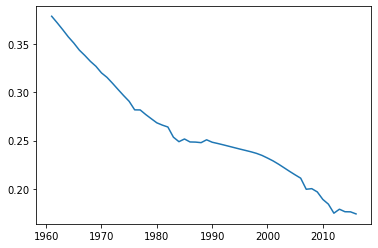

In [66]:
plt.plot(spain2['year'][:56], spain2['grazingLand'][:56])

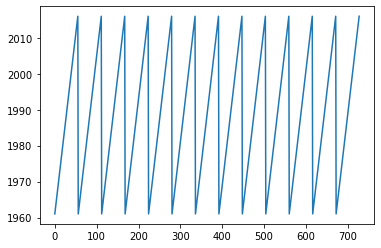

In [52]:
plot(spain2['year'])

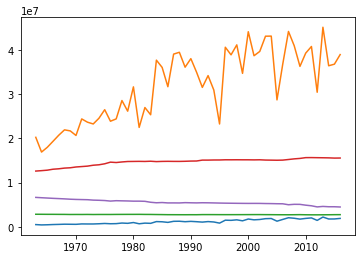

In [72]:
builtupLand = spain2['builtupLand'][170: 224]
cropLand = spain2['cropLand'][170: 224]
fishingGround = spain2['fishingGround'][170: 224]
forestLand = spain2['forestLand'][170: 224]
grazingLand = spain2['grazingLand'][170: 224]
x = spain2['year'][170: 224]

fig, ax = plt.subplots()
ax.plot(x, builtupLand, label="builtupLand")
ax.plot(x, cropLand, label="cropLand")
ax.plot(x, fishingGround, label="fishingGround")
ax.plot(x, forestLand, label="forestLand")
ax.plot(x, grazingLand, label="grazingLand")
ax.plot()

plt.show()

In [78]:
spain2.head()


,builtupLand,carbon,countryCode,countryName,cropLand,fishingGround,forestLand,grazingLand,id,isoa2,record,score,shortName,value,year
0,0.018509,0.0,203,Spain,0.741322,0.242950,0.364454,0.378919,86725,ES,AreaPerCap,3A,Spain,1.746155,1961
1,0.018509,0.0,203,Spain,0.736760,0.240241,0.363184,0.372112,86737,ES,AreaPerCap,3A,Spain,1.730807,1962
2,0.018509,0.0,203,Spain,0.728842,0.237503,0.364569,0.364997,86749,ES,AreaPerCap,3A,Spain,1.714420,1963
3,0.018509,0.0,203,Spain,0.710976,0.234814,0.363172,0.357582,86761,ES,AreaPerCap,3A,Spain,1.685053,1964
4,0.018509,0.0,203,Spain,0.704489,0.232224,0.361867,0.351136,86773,ES,AreaPerCap,3A,Spain,1.668225,1965
